In [15]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
itr = pd.read_sas("data/LLCP2023.XPT", chunksize=100000)
df_orig = pd.DataFrame()
for chunk in itr:
    df_orig = pd.concat([chunk[['DIABETE4','_AGE65YR','_RFHYPE6','_RFCHOL3','_BMI5','_SMOKER3','STRFREQ_','_DRNKWK2','SEXVAR','MENTHLTH','_EDUCAG','INCOME3','EMPLOY1','_IMPRACE','FLUSHOT7','_STATE']],df_orig])

In [17]:
# a = df_orig['_STATE']
# b = pd.read_csv('data/state_lkup.csv')[['STATE_','state']]
df_orig.merge(b, left_on='_STATE', right_on='STATE_')

,DIABETE4,_AGE65YR,_RFHYPE6,_RFCHOL3,_BMI5,_SMOKER3,STRFREQ_,_DRNKWK2,SEXVAR,MENTHLTH,_EDUCAG,INCOME3,EMPLOY1,_IMPRACE,FLUSHOT7,_STATE,STATE_,state
0,3.0,2.0,2.0,1.0,2650.0,4.0,3.000000e+03,5.397605e-79,1.0,1.0,4.0,9.0,7.0,1.0,2.0,53.0,53,Washington
1,3.0,1.0,1.0,2.0,3269.0,4.0,1.000000e+03,5.397605e-79,2.0,88.0,4.0,11.0,1.0,1.0,2.0,53.0,53,Washington
2,1.0,1.0,1.0,1.0,2763.0,1.0,1.000000e+03,1.870000e+02,2.0,88.0,2.0,6.0,5.0,1.0,2.0,53.0,53,Washington
3,1.0,2.0,1.0,1.0,2509.0,4.0,2.000000e+03,5.397605e-79,1.0,88.0,3.0,6.0,7.0,1.0,1.0,53.0,53,Washington
4,3.0,1.0,2.0,2.0,2661.0,4.0,4.667000e+03,5.397605e-79,1.0,88.0,3.0,6.0,1.0,2.0,2.0,53.0,53,Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433318,3.0,1.0,1.0,NaN,2918.0,1.0,5.397605e-79,5.397605e-79,2.0,5.0,2.0,5.0,5.0,1.0,2.0,16.0,16,Idaho
433319,3.0,1.0,2.0,1.0,2441.0,4.0,5.397605e-79,5.397605e-79,1.0,88.0,3.0,77.0,2.0,1.0,2.0,16.0,16,Idaho
433320,3.0,1.0,1.0,1.0,5721.0,3.0,5.000000e+03,2.300000e+01,1.0,88.0,4.0,7.0,1.0,1.0,2.0,16.0,16,Idaho
433321,3.0,2.0,2.0,2.0,2037.0,4.0,NaN,2.300000e+01,2.0,15.0,2.0,6.0,7.0,1.0,2.0,16.0,16,Idaho


In [18]:
df = df_orig.copy()

df = df.loc[(df['DIABETE4'].isin([1,3]))&(df['_AGE65YR'].isin([1,2]))].reset_index(drop=True) # diabetes - yes and no only/ age over 18 only

df['is_diabete'] = df['DIABETE4'].apply(lambda x:1 if x==1 else 0) # 1 : yes, 0 : no
df['high_blood_pressure'] = df['_RFHYPE6'].apply(lambda x: {1:0, 2:1}[x] if x in [1, 2] else None) # 1 : yes, 0 : no
df['high_cholesterol'] = df['_RFCHOL3'].apply(lambda x: {1:0, 2:1}[x] if x in [1, 2] else None) # 1 : yes, 0 : no
df['bmi'] = df['_BMI5']
df['smoke'] = df['_SMOKER3'].apply(lambda x:{1:'everyday_smoker',2:'someday_smoker',3:'former_smoker',4:'never_smoked'}[x] if x in [1, 2, 3, 4] else None)
df['exercise'] = df['STRFREQ_'].apply(lambda x:x if x<99000 else None) # strength activity frequency
df['alcohol'] = df['_DRNKWK2'].apply(lambda x:x if x<99900 else None) # alcohol consumption
df['gender'] = df['SEXVAR'].apply(lambda x:{1:1, 2:0}[x]) # 1 : male, 0 : female
df['mental_health'] = df['MENTHLTH'].apply(lambda x:x if x<=30 else 0 if x==88 else None) # number of days mental health is not good in a month
df['edu'] = df['_EDUCAG'].apply(lambda x: {1:'under_highschool',2:'highschool_grad',3:'attended_college',4:'college_grad'}[x] if x in [1,2,3,4] else None)
df['income'] = df['INCOME3'].apply(lambda x:x if x<=11 else None) # income level group : higher number indicates a higher income
df['employment'] = df['EMPLOY1'].apply(lambda x:1 if x in [1,2] else 0 if x in [3,4,5,6,7,8] else None)
df['race'] = df['_IMPRACE'].apply(lambda x:'white' if x==1 else 'black' if x==2 else 'asian' if x==3 else 'american_indian' if x==4 else 'hispanic' if x==5 else 'others')
df['flushot'] = df['FLUSHOT7'].apply(lambda x:1 if x==1 else 0 if x==2 else None)


state_lkup = pd.read_csv('data/state_lkup.csv')[['STATE_','state']]
df = df.merge(state_lkup, left_on='_STATE', right_on='STATE_')

df[['is_diabete','high_blood_pressure','high_cholesterol','bmi','smoke','exercise','alcohol','gender','mental_health','edu','income','employment','race','flushot','state']].to_csv('data/health_survey.csv', index=False)


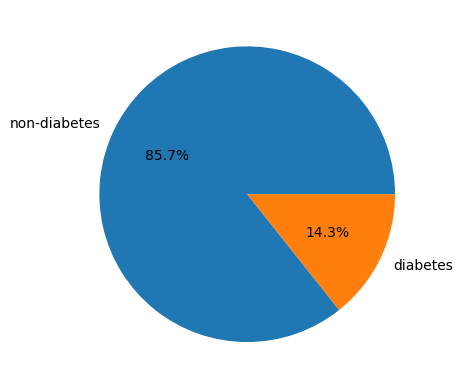

In [14]:
temp = df['is_diabete'].apply(lambda x:{0:'non-diabetes', 1:'diabetes'}[x]).value_counts()
plt.pie(temp, labels=temp.index, autopct='%1.1f%%')
plt.show()

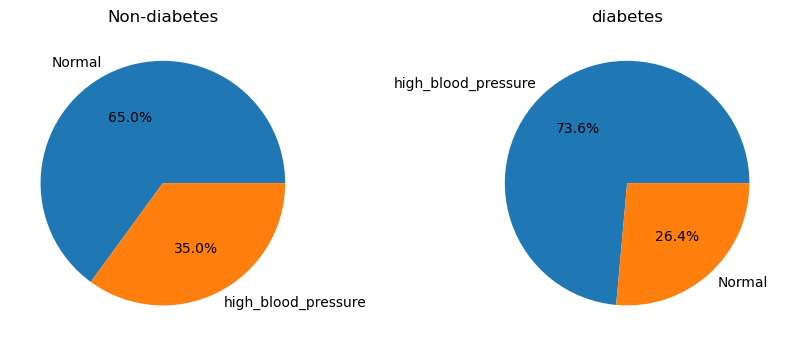

In [15]:

feature = 'high_blood_pressure'
fig, ax = plt.subplots(1,2, figsize=(8,4))
d0 = df[df['is_diabete']==0][feature].value_counts()
d1 = df[df['is_diabete']==1][feature].value_counts()
ax[0].pie(d0, labels=[{0:'Normal', 1:feature}[x] for x in d0.index], autopct='%1.1f%%')
ax[1].pie(d1, labels=[{0:'Normal', 1:feature}[x] for x in d1.index], autopct='%1.1f%%')
ax[0].set_title('Non-diabetes')
ax[1].set_title('diabetes')
plt.tight_layout()
plt.show()

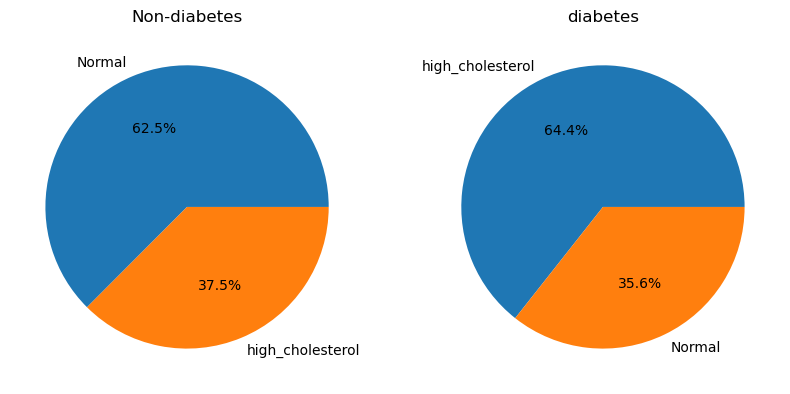

In [16]:
feature = 'high_cholesterol'
fig, ax = plt.subplots(1,2, figsize=(8,4))
d0 = df[df['is_diabete']==0][feature].value_counts()
d1 = df[df['is_diabete']==1][feature].value_counts()
ax[0].pie(d0, labels=[{0:'Normal', 1:feature}[x] for x in d0.index], autopct='%1.1f%%')
ax[1].pie(d1, labels=[{0:'Normal', 1:feature}[x] for x in d1.index], autopct='%1.1f%%')
ax[0].set_title('Non-diabetes')
ax[1].set_title('diabetes')
plt.tight_layout()
plt.show()

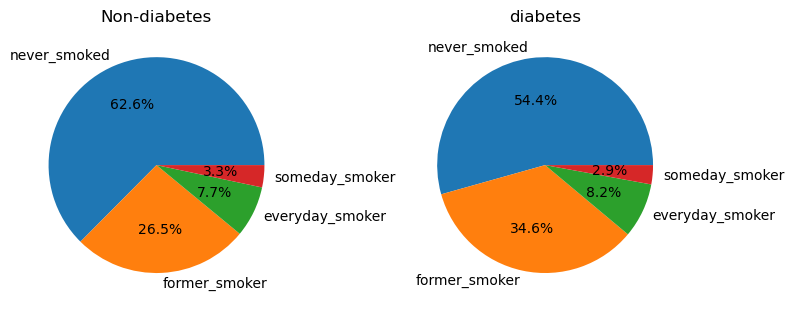

In [17]:
feature = 'smoke'
fig, ax = plt.subplots(1,2, figsize=(8,4))
d0 = df[df['is_diabete']==0][feature].value_counts()
d1 = df[df['is_diabete']==1][feature].value_counts()
ax[0].pie(d0, labels=d0.index, autopct='%1.1f%%')
ax[1].pie(d1, labels=d1.index, autopct='%1.1f%%')
ax[0].set_title('Non-diabetes')
ax[1].set_title('diabetes')
plt.tight_layout()
plt.show()

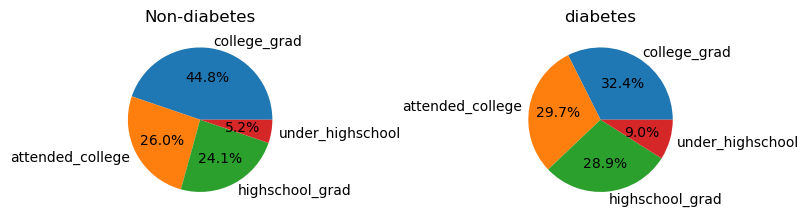

In [18]:
feature = 'edu'
fig, ax = plt.subplots(1,2, figsize=(8,4))
d0 = df[df['is_diabete']==0][feature].value_counts()
d1 = df[df['is_diabete']==1][feature].value_counts()
ax[0].pie(d0, labels=d0.index, autopct='%1.1f%%')
ax[1].pie(d1, labels=d1.index, autopct='%1.1f%%')
ax[0].set_title('Non-diabetes')
ax[1].set_title('diabetes')
plt.tight_layout()
plt.show()

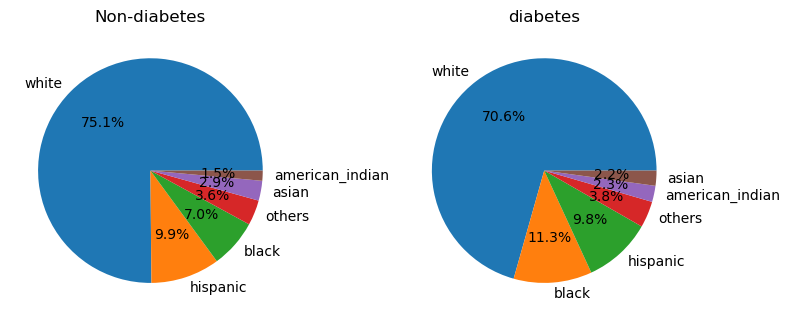

In [19]:
feature = 'race'
fig, ax = plt.subplots(1,2, figsize=(8,4))
d0 = df[df['is_diabete']==0][feature].value_counts()
d1 = df[df['is_diabete']==1][feature].value_counts()
ax[0].pie(d0, labels=d0.index, autopct='%1.1f%%')
ax[1].pie(d1, labels=d1.index, autopct='%1.1f%%')
ax[0].set_title('Non-diabetes')
ax[1].set_title('diabetes')
plt.tight_layout()
plt.show()